In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
drosophila = Table().with_columns("Phenotype", make_array('Red-eyed Female', 'Red-eyed Male', 'White-eyed Male'), 
                                 "Model", make_array(0.5, 0.25, 0.25),
                                  "Observed Number", make_array(307, 145, 180))
drosophila = drosophila.with_columns('Observed', drosophila.column("Observed Number") / 632)
drosophila = drosophila.drop("Observed Number")
drosophila

Phenotype,Model,Observed
Red-eyed Female,0.5,0.485759
Red-eyed Male,0.25,0.22943
White-eyed Male,0.25,0.28481


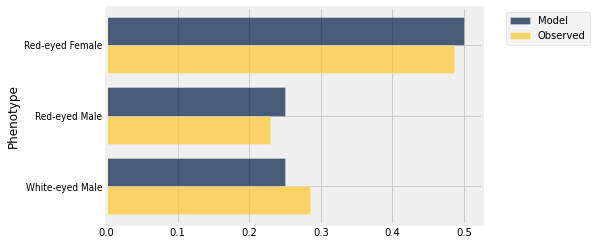

In [3]:
drosophila.barh("Phenotype")

### How do we write a function to calculate the distance between the two distributions (TVDs)

In [4]:
import math 

def calculate_tvd(column1, column2):
    ## compute the absolute difference in proportions
    differences = abs(column1 - column2)
    ## sum it up 
    sum_of_differences = sum(differences)
    tvd = sum_of_differences / 2
    return tvd

In [5]:
obs_tvd = calculate_tvd(drosophila.column("Model"), drosophila.column("Observed"))
obs_tvd

0.0348101265822785

In [ ]:
## Total Variation Distance between Observed and Model is ...

## Let's take a look at a Single Random Sample.  Add a Random Sample Column to Figure

In [6]:
model = drosophila.column("Model")
model

array([0.5 , 0.25, 0.25])

In [7]:
drosophila_w_sample = drosophila.with_column("Random Sample", sample_proportions(632, model))
drosophila_w_sample

Phenotype,Model,Observed,Random Sample
Red-eyed Female,0.5,0.485759,0.484177
Red-eyed Male,0.25,0.22943,0.261076
White-eyed Male,0.25,0.28481,0.254747


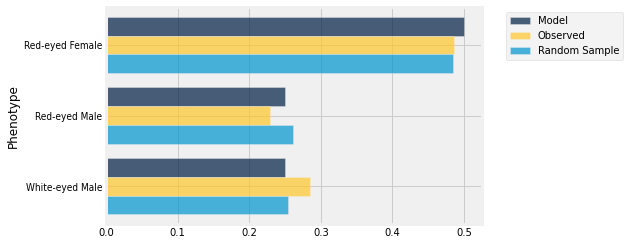

In [8]:
drosophila_w_sample.barh("Phenotype")

In [9]:
## What is the Total Variation Distance between the random sample and the model
calculate_tvd(drosophila_w_sample.column("Random Sample"), drosophila_w_sample.column("Model"))

0.015822784810126583

### Let's run a simulation of many samples from the model.  

In [10]:
total_var_dist = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    ## find sample proportions 
    sample_dist = sample_proportions(632, model)
    ## calculate tvd between sample proportions and model 
    tvd = calculate_tvd(sample_dist, model)
    total_var_dist = np.append(total_var_dist, tvd)

print(len(total_var_dist))

10000


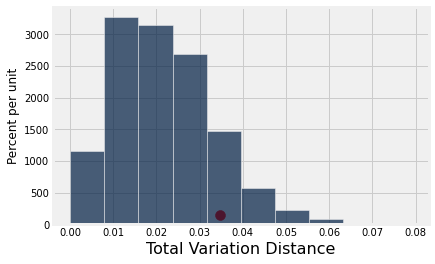

In [11]:
Table().with_column("Total Variation Distance", total_var_dist).hist()
plots.scatter(obs_tvd, 1.5, color = 'red', s =100)

In [12]:
obs_tvd

0.0348101265822785